<a href="https://colab.research.google.com/github/kosinovna-1/mathpack2024/blob/main/De_Vigenere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сделаем подготовительную работу. Сохраним алфавит, счётчик алфавита и прочитаем текст из файла.
Также напишем функцию, которая будет выводить график частоты встречающихся букв

In [39]:
alph = [chr(ord('a')+i) for i in range(26)]

f = open('cipher.txt','r',encoding= 'Windows-1251')
cipher = f.read()
f.close()
symbols = 0
for c in cipher:
  if c in alph: symbols += 1
print('Количество букв в зашифрованном тексте:',symbols)

rate = {}
for c in alph:
  rate[c] = 0

def display(rate):
  import matplotlib.pyplot as plt
  for c in rate:
    plt.plot(c,rate[c],'ob')
  plt.show()

Количество букв в зашифрованном тексте: 17148



Для расшифровки сначала найдём длину ключа. Для этого будем анализировать буквы текста, взятые через 2,3 и т.д. символы и посмотрим, в какой момент распределение букв будет максимально не рандомным.



1
Длина проверяемого ключа: 2


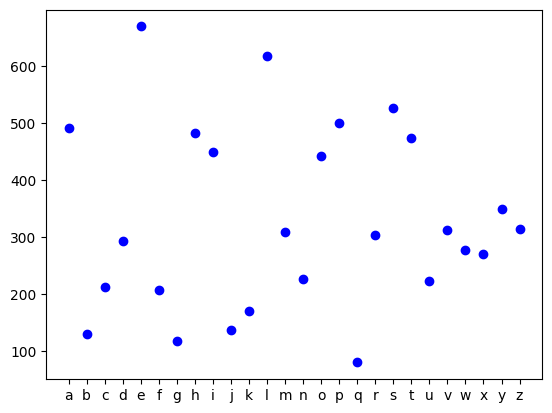

In [19]:
steps = int(input())
n = 1
while n-1 < steps:
  rate = {}
  for c in alph:
    rate[c] = 0
  text = ''
  text = cipher[::n]
  for c in text:
    if c in rate:
      rate[c] += 1
  print('Длина проверяемого ключа:',n)
  display(rate)
  n += 1

Попробуем посмотреть тестом Касиски. Посчитаем для каждого сдвига индекс совпадений. Будем пробовать шаги до

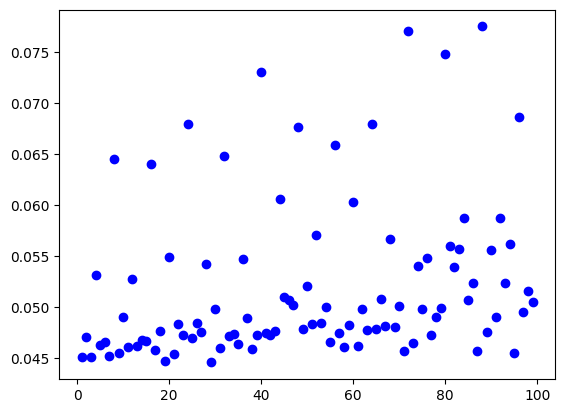

In [29]:
import matplotlib.pyplot as plt

def index(n):
  text = cipher[::n]
  m = 0
  rate = {}
  for c in alph:
    rate[c] = 0
  for c in text:
    if c in alph:
      m += 1
      rate[c] += 1
  ci = 0
  for c in rate:
    ci += (rate[c]/m)**2
  return ci

for n in range(1,100):
  plt.plot(n,index(n),'ob')
plt.show()

Мы видим несколько точек, близких к 0.065. Попробуем отобрать около 10 самых близких значений, и посмотрим, какой длины ключи могли при этом использоваться

In [54]:
def include(n,e):
  maxi = 0
  for i in range(1,len(lenkeys)):
    if eps[i]>eps[maxi]:
      maxi = i
  lenkeys[maxi] = n
  eps[maxi] = e

eng_ind = 0.065
lenkeys = []
eps = []
for n in range(1,11):
  ci = index(n)
  lenkeys.append(n)
  eps.append(abs(ci-eng_ind))
for n in range(len(lenkeys)+1,100):
  ci = index(n)
  if abs(ci-eng_ind) < max(eps):
    include(n,abs(ci-eng_ind))

for i in range(len(lenkeys)):
  print(lenkeys[i],eps[i])

64 0.0029865470241418196
24 0.002991011516494474
44 0.004356850215156277
48 0.0027101214069473467
96 0.0036511290906895283
60 0.00469181403479365
16 0.0009751010002901073
8 0.0004801823790499121
32 0.0001956567047399771
56 0.00089345978042632


Мы видим, что самые близкие к индексу совпадения в нормальном тексте значения получаются при 8,16,32,56. Все эти числа делятся на 8, откуда можно предположить, что и длина ключа делится на 8. Проверим это, посмотрев на индексы совпадений по всем значениям для n, кратным 8

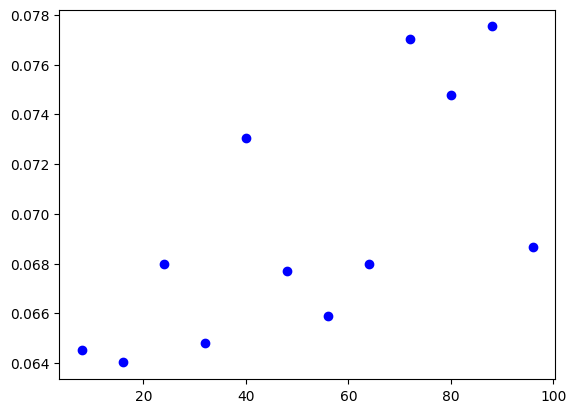

In [48]:
for n in range(8,100,8):
  plt.plot(n,index(n),'ob')
plt.show()

Изменения хоть и приемлимые, однако, график получился довольно зубчатый, а с шагом 16 (если брать точки через 1) чуть более пологий. Поэтому длина ключа 16 будет нашей второй гипотезой. Ну и раз шаг 32 показал наилучший результат, то 32 - третьей


Теперь, взяв предварительно длину ключа равной 8, попробуем подобрать сам ключ. Для этого построем 8 гистаграмм, и для каждой попробуем определить самые частые "пики" и "пеньки"

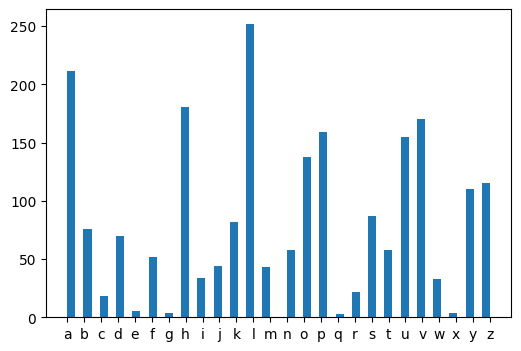

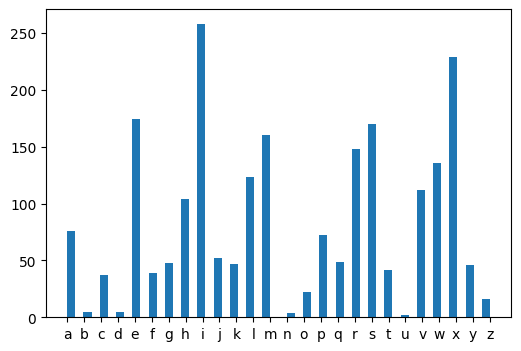

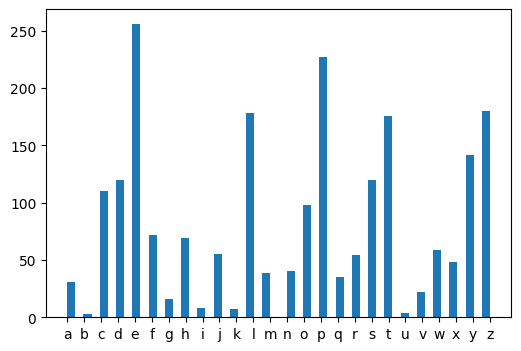

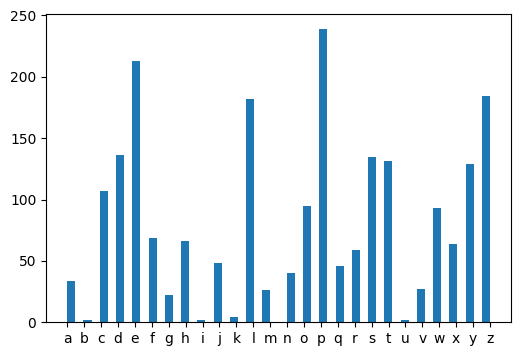

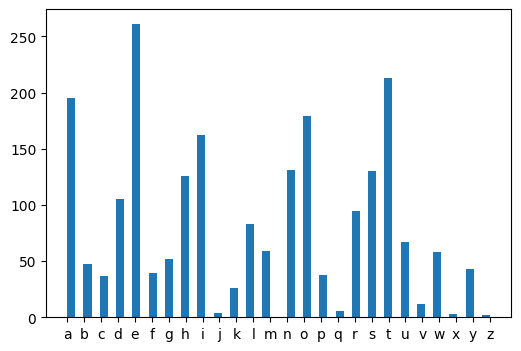

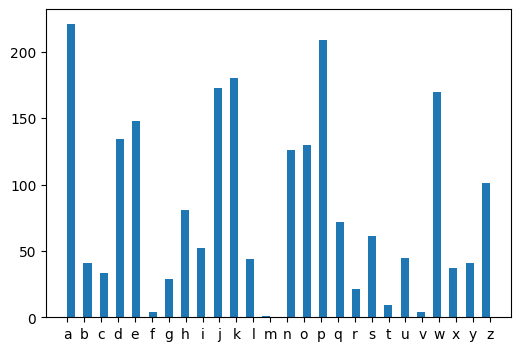

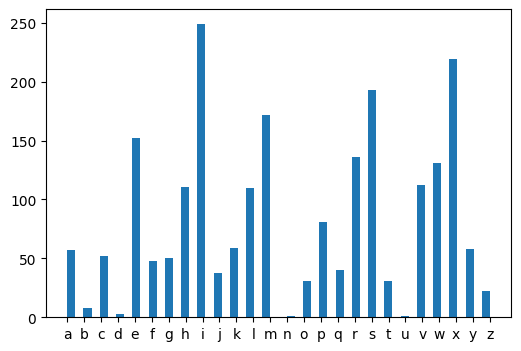

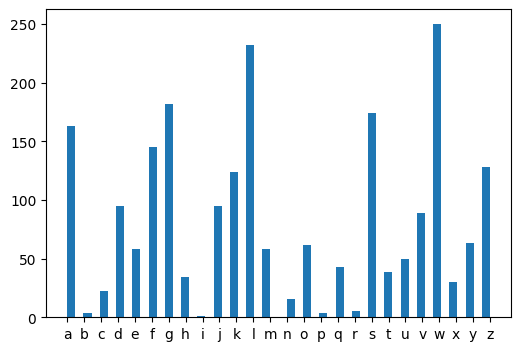

In [55]:
def display(n,shift):
  fig = plt.figure(figsize=(6, 4))
  ax = fig.add_subplot()
  text = cipher[shift::n]
  y = [c for c in alph]
  for c in text:
    if c in alph:
      y.append(c)
  ax.hist(y,52)
  plt.show()

n = 8
for i in range(n):
  display(n,i)

Отлично! Теперь ищем на графиках паттерны, отвечающие распространённым буквам 'AEHINORST' и нераспространённым 'JQXZ'. Для накладывания шаблона, построим такую гистаграмму.

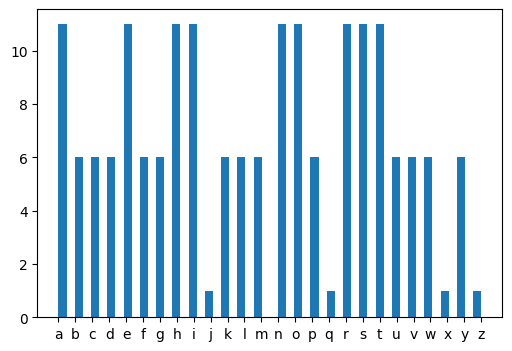

In [56]:
def example():
  fig = plt.figure(figsize=(6, 4))
  ax = fig.add_subplot()
  y = [c for c in alph]
  for c in alph:
    if c in 'aehinorst':
      for i in range(10): y.append(c)
    elif c not in 'jqxz':
      for i in range(5): y.append(c)
  ax.hist(y,52)
  plt.show()

example()

Анализируя графики, обращая особое внимание на буквы 'RST', т.к. они идут подряд, посмотрим, в какие буквы предположительно переходит буква 'A'. Получаем предварительный ключ: 'hallawes'. Попробуем с помощью него расшифровать первую строчку файла.

In [57]:
key = 'hallawes'
string = cipher[:cipher.find('\n')]
from vigenere import decrypt_vigenere as dv

print(dv(string,key))

“wurelyyoy’rejokirg,mr.fecnman!”:edventurisofacurmouscharecterbyrmchardp.jeynman


Посмотрев на строчку внимательно, я увидел очень знакомое 'mr.fecman', и перепроверил вторую букву ключа. Похоже, что она должна быть не 'a', а 'e'. Попытка вторая.

In [58]:
key = 'hellawes'
string = cipher[:cipher.find('\n')]

print(dv(string,key))

“surelyyou’rejoking,mr.feynman!”:adventuresofacuriouscharacterbyrichardp.feynman


Surely You're Joking, Mr. Feynman!
УРАААА!
И, весь текст. Заодно сравним его с первой частью одной из моих любимых книг :)

In [59]:
decipher = dv(cipher,key)
print(decipher)

“surelyyou’rejoking,mr.feynman!”:adventuresofacuriouscharacterbyrichardp.feynman
part1.fromfarrockawaytomit
hefixesradiosbythinking!
wheniwasaboutelevenortwelveisetupalabinmyhouse.itconsistedofanoldwoodenpackingboxthatiputshelvesin.ihadaheater,andi’dputinfatandcookfrench-friedpotatoesallthetime.ialsohadastoragebattery,andalampbank.
tobuildthelampbankiwentdowntothefive-and-tenandgotsomesocketsyoucanscrewdowntoawoodenbase,andconnectedthemwithpiecesofbellwire.bymakingdifferentcombinationsofswitches—inseriesorparallel—iknewicouldgetdifferentvoltages.butwhatihadn’trealizedwasthatabulb’sresistancedependsonitstemperature,sotheresultsofmycalculationsweren’tthesameasthestuffthatcameoutofthecircuit.butitwasallright,andwhenthebulbswereinseries,allhalf-lit,theywouldgloooooooooow,verypretty—itwasgreat!
ihadafuseinthesystemsoifishortedanything,thefusewouldblow.nowihadtohaveafusethatwasweakerthanthefuseinthehouse,soimademyownfusesbytakingtinfoilandwrappingitaroundanoldburnt-outfuse.acrossmyfuseihadaf

“Surely you’re joking, Mr.Feynman!”: adventure sofa curious character by Richard P.Feynman

Part 1


From Far Rockaway to MIT



--------
He Fixes Radios by Thinking!


When I  was about  eleven  or twelve I set up  a  lab in  my house.  It
consisted of an  old wooden packing box  that  I put shelves  in.  I  had  a
heater, and I'd put  in fat and cook  french-fried potatoes all the  time. I
also had a storage battery, and a lamp bank.
     To  build the lamp  bank I went down  to  the five-and-ten and got some
sockets you can screw down to  a wooden base, and connected them with pieces
of bell wire. By  making different combinations of switches --  in series or
parallel  --  I  knew I could  get  different  voltages.  But what  I hadn't
realized was  that a bulb's  resistance depends on its  temperature,  so the
results of my calculations weren't the  same as the stuff  that came  out of
the  circuit. But it was  all  right, and when the bulbs were in series, all
half-lit, they would gloooooooooow, very pretty -- it was great!
     I had a fuse in  the  system  so  if I shorted anything, the fuse would
blow. Now  I had to have a fuse that  was weaker than the fuse in the house,
so I made  my  own fuses by taking  tin foil  and wrapping it around  an old
burnt-out fuse. Across my fuse I had a five-watt bulb, so when my fuse blew,
the load  from the  trickle charger that  was  always  charging  the storage
battery  would light up the  bulb. The bulb was on the  switchboard behind a
piece of brown candy paper (it looks red  when a light's behind it) -- so if
something went off, I'd look up to the  switchboard and there would be a big
red spot where the fuse went. It was fun!
     I enjoyed radios.  I started with a crystal  set  that I bought at  the
store, and  I used  to listen to it  at night  in bed while  I was going  to
sleep, through a pair of earphones. When my mother and father went out until
late at night,  they would come  into  my room and take the earphones off --
and worry about what was going into my head while I was asleep.
     About  that  time  I  invented  a  burglar  alarm,  which  was  a  very
simple-minded thing:  it was just a  big  battery and a bell connected  with
some wire. When the door  to my room opened, it pushed the  wire against the
battery and closed the circuit, and the bell would go off.
     One  night my mother and father came home from  a  night out and  very,
very quietly, so as not to disturb the child, opened  the  door to come into
my room to take my earphones off. All of a sudden this tremendous  bell went
off with a helluva racket -- BONG BONG BONG BONG BONG!!! I jumped out of bed
yelling, "It worked! It worked!"
     I had a Ford coil -- a spark coil from an automobile --  and I  had the
spark terminals  at the top of my  switchboard. I  would  put  a Raytheon RH
tube, which had argon  gas  in it, across the terminals, and the spark would
make a purple glow inside the vacuum -- it was just great!
     One day I was playing with the Ford coil, punching  holes in paper with
the  sparks, and the paper caught  on fire. Soon I couldn't hold it any more
because  it  was  burning  near  my  fingers,  so  I dropped  it in a  metal
wastebasket which had a lot of newspapers in  it. Newspapers burn fast,  you
know, and the flame looked pretty big inside the room. I shut the door so my
mother  -- who was  playing  bridge with some friends in  the living room --
wouldn't find  out there was a  fire in my  room,  took a magazine that  was
lying nearby, and put it over the wastebasket to smother the fire.
     After the fire  was out I took the magazine off, but now the room began
to fill up with smoke. The wastebasket was still too hot to handle, so I got
a pair of pliers, carried it across the room, and held it out the window for
the smoke to blow out.
     But because it was breezy outside, the wind lit the fire again, and now
the magazine was  out of  reach. So I pulled the flaming wastebasket back in
through the window to get the magazine, and I noticed there were curtains in
the window -- it was very dangerous!
     Well, I got  the magazine, put the fire out  again,  and this time kept
the magazine with me while I shook the  glowing coals out of  the wastepaper
basket  onto the street, two  or three floors  below. Then  I went out of my
room, closed the door behind  me, and said to my mother, "I'm going  out  to
play," and  the  smoke went out slowly through the windows. I also  did some
things with  electric motors  and built an amplifier for a photo cell that I
bought that could make a bell ring when I put my hand in  front of the cell.
I didn't get to do as much as I wanted to, because my mother kept putting me
out all the time, to play. But I was  often in  the house, fiddling  with my
lab.
     I  bought  radios  at rummage  sales. I  didn't have  any money, but it
wasn't very expensive -- they were old, broken radios,  and I'd buy them and
try to fix them. Usually they were broken  in some simple-minded way -- some
obvious wire was hanging loose, or a coil was broken or partly unwound -- so
I could get some of them going. On one of these  radios one night I got WACO
in Waco, Texas -- it was tremendously exciting!
     On this same tube radio up in my lab I was able to hear a station up in
Schenectady  called  WGN. Now, all of us kids -- my two cousins, my  sister,
and the  neighborhood kids -- listened on the radio downstairs to  a program
called  the  Eno Crime Club -- Eno effervescent  salts -- it  was the thing!
Well, I discovered  that I could hear this  program up in my lab on  WGN one
hour before it was broadcast in New York! So  I'd discover what was going to
happen,  and then, when  we were  all sitting  around  the radio  downstairs
listening to the Eno Crime Club, I'd say,  "You know, we haven't heard  from
so-and-so in a long time. I betcha he comes and saves the situation."
     Two seconds later,  bup-bup, he comes! So  they all  got  excited about
this, and I  predicted a couple of other  things.  Then  they  realized that
there must  be some trick to it -- that I must know, somehow. So I owned  up
to what it was, that I could hear it upstairs the hour before.
     You know what the result was, naturally. Now they couldn't wait for the
regular hour. They all had to sit upstairs in my lab with this little creaky
radio for half an hour, listening to the Eno Crime Club from Schenectady.
     We lived at that time in a big house;  it was left by my grandfather to
his children, and they didn't have much money aside from the house. It was a
very large, wooden house, and I  would run wires all around the outside, and
had plugs in  all the  rooms, so  I could always  listen to my radios, which
were upstairs in my lab. I also had a loudspeaker -- not  the whole speaker,
but the part without the big horn on it.
     One  day,  when  I  had my  earphones  on,  I  connected  them  to  the
loudspeaker, and I  discovered something: I put my finger in the speaker and
I could hear it in the earphones; I scratched the speaker and I'd hear it in
the earphones. So I discovered that the speaker could act like a microphone,
and  you  didn't  even  need  any batteries. At school we were talking about
Alexander Graham Bell,  so I  gave  a demonstration  of  the speaker and the
earphones. I didn't know  it at the time,  but I think  it was  the type  of
telephone he originally used.
     So now I  had  a  microphone, and I  could  broadcast from upstairs  to
downstairs, and  from downstairs  to  upstairs,  using  the amplifiers of my
rummage-sale radios. At that time my sister Joan, who was nine years younger
than I was, must  have been about two  or three, and there was  a guy on the
radio called Uncle Don that she  liked to listen  to. He'd sing little songs
about "good  children," and so on,  and  he'd read cards  sent in by parents
telling  that  "Mary  So-and-so is  having a birthday  this  Saturday at  25
Flatbush Avenue."
     One day my cousin Francis and I sat Joan down and said that there was a
special program she should listen to. Then we ran upstairs and we started to
broadcast: "This  is Uncle Don. We know a very nice  little girl named  Joan
who lives on New Broadway; she's  got a birthday  coming --  not  today, but
such-and-such. She's a cute girl." We  sang a little song,  and then we made
music:  "Deedle  leet deet,  doodle  doodle  loot  doot; deedle deedle leet,
doodle loot doot doo..."  We went  through the whole deal,  and then we came
downstairs: "How was it? Did you like the program?"
     "It was good,"  she said, "but  why  did  you make the music  with your
mouth?"

     One day I got a telephone call: "Mister, are you Richard Feynman?"
     "Yes."
     "This is a hotel. We have a radio that doesn't work, and would like  it
repaired. We understand you might be able to do something about it."
     "But I'm only a little boy," I said. "I don't know how --"
     "Yes, we know that, but we'd like you to come over anyway."
     It was a hotel that my aunt was running, but I didn't know that. I went
over there with -- they still tell the story -- a big screwdriver in my back
pocket. Well, I was small, so any screwdriver looked big in my back pocket.
     I went up to  the  radio and tried  to fix  it. I  didn't know anything
about it, but there was also a handyman at the hotel, and either he noticed,
or  I noticed, a  loose knob on the  rheostat -- to turn up the volume -- so
that it wasn't turning the shaft. He went off and filed something, and fixed
it up so it worked.
     The next radio I tried to  fix didn't work  at all.  That was easy:  it
wasn't plugged in right. As the repair jobs got more and more complicated, I
got better and better, and more elaborate. I bought myself a milliammeter in
New York and converted  it into a voltmeter that  had different scales on it
by using the right lengths (which I calculated) of very fine copper wire. It
wasn't very accurate,  but it was good enough to tell whether things were in
the right ballpark at different connections in those radio sets.
     The main  reason people  hired me was the Depression. They didn't  have
any money to fix their  radios,  and they'd hear about this kid who would do
it for less. So I'd climb on roofs to fix antennas, and all  kinds of stuff.
I  got  a series of  lessons of ever-increasing difficulty. Ultimately I got
some job like converting a DC set into an AC set,  and it was very  hard  to
keep the hum from going  through  the system, and  I didn't  build  it quite
right. I shouldn't have bitten that one off, but I didn't know.
     One  job  was  really  sensational. I was  working at  the  time  for a
printer, and a man who  knew that  printer knew  I  was trying to  get  jobs
fixing  radios, so he sent a  fellow around to the print shop to pick me up.
The guy is obviously poor -- his car is a complete wreck -- and we go to his
house which is in  a cheap  part of  town.  On the way,  I say, "What's  the
trouble with the radio?"
     He says, "When I turn  it on  it makes  a noise, and after a while  the
noise stops and everything's  all right, but  I don't like the noise at  the
beginning."
     I think to myself: "What the hell!  If he  hasn't got any  money, you'd
think he could stand a little noise for a while."
     And all the time, on the way to his house, he's saying things like, "Do
you know anything about radios? How do  you know about radios -- you're just
a little boy!"
     He's  putting  me down the whole way,  and I'm thinking, "So what's the
matter with him? So it makes a little noise."
     But when we got there I went over to the radio and turned it on. Little
noise? My God! No wonder the poor guy couldn't stand it.  The thing began to
roar and wobble --WUH BUH BUH BUH BUH -- A tremendous amount of noise.  Then
it quieted down and  played correctly. So I  started to think: "How can that
happen?"
     I start walking back and forth, thinking, and I realize that one way it
can happen is that the tubes  are heating up in the wrong  order -- that is,
the amplifier's all  hot,  the tubes are ready  to  go, and there's  nothing
feeding in, or there's some back circuit feeding in, or  something wrong  in
the beginning  part  --  the RF part -- and therefore it's  making a lot  of
noise, picking up something.  And when the RF circuit's finally  going,  and
the grid voltages are adjusted, everything's all right.
     So the  guy  says, "What are you doing? You  come to fix the radio, but
you're only walking back and forth!"
     I say, "I'm  thinking!"  Then I said to  myself,  "All right, take  the
tubes out, and reverse the order completely in the set." (Many radio sets in
those days  used  the same tubes in different places -- 212's, I think  they
were, or  212-A's.) So I changed  the tubes around, stepped to the front  of
the radio, turned the thing on,  and it's as quiet as a lamb: it waits until
it heats up, and then plays perfectly -- no noise.
     When a  person has been negative to you, and then you do something like
that,  they're  usually  a  hundred  percent  the  other  way,  kind  of  to
compensate.  He  got  me  other  jobs,  and  kept telling everybody  what  a
tremendous genius I  was, saying,  "He fixes radios  by thinking!" The whole
idea of thinking, to  fix  a radio --  a little  boy  stops and  thinks, and
figures out how to do it -- he never thought that was possible.
     Radio circuits were much  easier  to understand  in those  days because
everything was out in  the open. After you took the set  apart (it was a big
problem to find the right screws), you could see this was a resistor, that's
a condenser, here's a this, there's  a that; they were  all labeled.  And if
wax had been dripping from the condenser, it was too hot and you could  tell
that  the  condenser was burned out. If  there  was charcoal on one  of  the
resistors  you knew where the trouble was. Or, if you couldn't tell what was
the  matter by  looking at  it,  you'd test  it with your  voltmeter and see
whether voltage  was coming through. The sets were simple, the circuits were
not complicated. The voltage on the grids was always about one and a half or
two volts  and the voltages on the plates were one hundred  or  two hundred,
DC. So it wasn't hard for me to fix a radio by  understanding what was going
on inside, noticing that something wasn't working right, and fixing it.
     Sometimes it took quite a while. I remember one particular time when it
took  the  whole  afternoon  to  find a  burned-out  resistor that  was  not
apparent. That particular time it happened to be a friend of my mother, so I
had  time -- there  was  nobody on my back  saying,  "What  are  you doing?"
Instead, they were saying,  "Would you like a little milk, or some cake?"  I
finally fixed it because I had, and still have, persistence. Once I get on a
puzzle, I can't get  off. If my mother's friend had  said, "Never mind, it's
too much work,"  I'd  have blown  my  top, because  I want to beat this damn
thing, as long as I've gone this far. I can't just leave it after I've found
out so much  about it. I  have  to keep going to find out ultimately what is
the matter with it in the end.
     That's  a puzzle drive. It's what accounts  for my  wanting to decipher
Mayan hieroglyphics,  for  trying to open  safes. I remember in high school,
during first period a guy would come to me  with  a puzzle in  geometry,  or
something which  had been assigned in his  advanced math class.  I  wouldn't
stop until I  figured the damn  thing  out -- it would  take  me fifteen  or
twenty minutes. But  during the day, other guys would  come to  me with  the
same problem, and I'd do it for them  in  a flash. So for one guy,  to do it
took me twenty  minutes, while  there were  five  guys who  thought I  was a
super-genius.
     So I got a fancy reputation. During high school  every puzzle  that was
known to man must have come to me. Every damn,  crazy conundrum that  people
had invented, I knew. So when I got to MIT there was a dance, and one of the
seniors had his girlfriend there, and she knew a lot of puzzles,  and he was
telling her that I was  pretty good at them. So  during  the  dance she came
over to me and said, "They say you're a smart guy, so here's one  for you: A
man has eight cords of wood to chop..."
     And I said, "He  starts  by  chopping every other one in  three parts,"
because I had heard that one.
     Then  she'd go away and come back with another one, and I'd always know
it.
     This went on for quite a while, and finally, near the end of the dance,
she came over, looking as if she was going to get me for sure this time, and
she said, "A mother and daughter are traveling to Europe..."
     "The  daughter got the bubonic plague." She collapsed! That was  hardly
enough clues to get the answer to that one: It was  the long story about how
a mother and  daughter stop at a hotel and  stay in  separate rooms, and the
next day the mother goes to the daughter's room and there's nobody there, or
somebody else is there, and she says, "Where's  my daughter?" and the  hotel
keeper says, "What daughter?" and the register's got only the mother's name,
and so on, and so on, and there's  a  big  mystery as to  what happened. The
answer is, the daughter got  bubonic  plague, and  the hotel, not wanting to
have to close up, spirits the  daughter away, cleans up the room, and erases
all evidence of her having  been there. It was a long  tale, but I had heard
it, so when the girl started out with, "A mother  and daughter are traveling
to  Europe,"  I knew one thing  that started that way,  so I took  a  flying
guess, and got it.
     We had a thing at high school called the algebra  team, which consisted
of  five kids, and we would  travel to different schools  as a team and have
competitions. We would sit in one row of seats and the other  team would sit
in another  row. A teacher,  who was running the contest, would take out  an
envelope, and on the envelope it says "forty-five seconds." She opens it up,
writes the  problem on the blackboard, and says, "Go!" -- so you really have
more than forty-five seconds because while she's writing you  can think. Now
the game was  this: You  have a piece of paper,  and  on  it you  can  write
anything, you can do anything.  The only  thing that counted was the answer.
If the answer was "six books," you'd have to write "6," and put a big circle
around it. If what was in the circle was right,  you won; if  it wasn't, you
lost.
     One thing was for sure: It was practically impossible to do the problem
in any  conventional, straightforward way, like putting  "A is the number of
red books, B is  the number of blue books," grind,  grind, grind, until  you
get "six books." That would take you fifty seconds, because  the people  who
set up the timings on  these  problems had made them all a  trifle short. So
you had to think, "Is there a way to see  it?" Sometimes you could see it in
a flash, and sometimes you'd have to invent another way to do it and then do
the algebra  as fast  as  you could.  It was wonderful  practice,  and I got
better and  better, and I  eventually got to be the  head of the team.  So I
learned to do algebra very quickly, and it came in handy in college. When we
had a problem in calculus, I was very quick to see where it was going and to
do the algebra -- fast.
     Another thing I did in high school was to invent problems and theorems.
I  mean,  if I  were doing any mathematical thing at all, I would  find some
practical  example  for  which  it  would  be  useful.  I invented a set  of
right-triangle  problems. But instead of  giving  the lengths of  two of the
sides  to find the third, I gave the  difference of the two sides. A typical
example was: There's a flagpole, and there's a rope that comes down from the
top. When you hold the rope straight  down, it's three feet longer than  the
pole, and when you pull  the rope out tight, it's five feet from the base of
the pole. How high is the pole?
     I developed some  equations  for  solving problems like that, and as  a
result I noticed some connection -- perhaps it was sin^2 + cos^2 = 1 -- that
reminded me  of  trigonometry. Now, a few years earlier, perhaps when I  was
eleven  or twelve, I had read a book on trigonometry that I had checked  out
from the library, but the book was by now long gone.  I remembered only that
trigonometry  had something to do  with relations between sines and cosines.
So I began to work out  all the relations by drawing triangles, and each one
I  proved, by  myself. I  also calculated  the sine, cosine, and tangent  of
every  five degrees, starting  with  the sine of five degrees  as given,  by
addition and half-angle formulas that I had worked out.
     A few years later, when we studied  trigonometry in school, I still had
my notes and I saw that my demonstrations were often different from those in
the  book. Sometimes,  for a thing where  I didn't notice a simple way to do
it,  I  went all over  the place till I got it. Other times, my way was most
clever  -- the standard demonstration in the book was much more complicated!
So sometimes I had 'em beat, and sometimes it was the other way around.
     While I was doing all this trigonometry, I  didn't like the symbols for
sine, cosine, tangent, and so on. To me, "sin f" looked like s times i times
n times f! So I invented another symbol, like a square root sign, that was a
sigma with a long arm  sticking out  of  it, and I put the f underneath. For
the  tangent it was a  tau with  the top of  the  tau extended, and for  the
cosine I made a kind  of gamma,  but it looked  a little bit like the square
root sign.
     Now the inverse sine was the same sigma, but left-to-right reflected so
that it started with the horizontal line with the value underneath, and then
the sigma.  That was the inverse sine, NOT sin^-1 f -- that was crazy!  They
had that in books! To me, sin^-1 meant 1/sine, the reciprocal. So my symbols
were better.
     I didn't like f(x) -- that  looked  to me like f times x. I also didn't
like dy/dx -- you have a tendency to cancel the d's -- so I made a different
sign, something like an & sign.  For logarithms it was  a big L extended  to
the right, with the thing you take the log of inside, and so on.
     I thought my symbols were just as good, if not better, than the regular
symbols --  it doesn't make any difference  what  symbols you  use --  but I
discovered later that it does make a  difference. Once when I was explaining
something to another kid in high school,  without thinking I started to make
these  symbols, and he said, "What the hell are those?" I realized then that
if I'm going to talk to anybody else, I'll have to use the standard symbols,
so I eventually gave up my own symbols.
     I had also invented a set  of symbols  for the typewriter, like fortran
has  to do, so I could type equations. I also  fixed typewriters, with paper
clips and rubber bands (the rubber bands didn't break down like they do here
in Los Angeles), but I wasn't a professional repairman; I'd just fix them so
they would work. But the whole problem  of discovering what was  the matter,
and  figuring out what you have to do to  fix it -- that was interesting  to
me, like a puzzle.
